In [4]:
!pip install yfinance pandas requests beautifulsoup4 plotly

In [5]:
import yfinance as yf
import pandas as pd

# Create a Ticker object for Tesla (TSLA)
tesla = yf.Ticker("TSLA")

# Extract historical stock data with period="max"
tesla_data = tesla.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Download the webpage with a user-agent
tesla_url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
response = requests.get(tesla_url, headers=headers)

# Check if the request was successful
if response.status_code != 200:
    print(f"Failed to fetch Tesla webpage: Status code {response.status_code}")
    exit()

tesla_html_data = response.text

# Parse the HTML data
tesla_soup = BeautifulSoup(tesla_html_data, "html.parser")

# Find all tables
tesla_tables = tesla_soup.find_all('table')

# Debug: Print the number of tables and their content
print(f"Number of tables found: {len(tesla_tables)}")
for index, table in enumerate(tesla_tables):
    print(f"Table {index} content (first 100 chars): {str(table)[:100]}")

# Find the table with Tesla Quarterly Revenue
tesla_table_index = None
for index, table in enumerate(tesla_tables):
    if "Tesla Quarterly Revenue" in str(table):
        tesla_table_index = index
        print(f"Tesla Quarterly Revenue table found at index: {tesla_table_index}")
        break

# Fallback: If not found, try a more general search
if tesla_table_index is None:
    print("Warning: 'Tesla Quarterly Revenue' not found. Trying alternative table search...")
    for index, table in enumerate(tesla_tables):
        if "Revenue" in str(table):  # Broader search for any revenue table
            tesla_table_index = index
            print(f"Alternative revenue table found at index: {tesla_table_index}")
            break

# Check if a table was found
if tesla_table_index is None:
    print("Error: No revenue table found. Please check the webpage structure or URL.")
    exit()

# Create an empty DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Extract table data
try:
    for row in tesla_tables[tesla_table_index].tbody.find_all("tr"):
        col = row.find_all("td")
        if col:  # Ensure the row is not empty
            date = col[0].text.strip()
            revenue = col[1].text.strip().replace("$", "").replace(",", "")
            tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)
except AttributeError:
    print("Error: Table structure is invalid (no tbody or tr tags). Check the webpage HTML.")

# Remove empty or NaN revenue rows
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""].dropna(subset=['Revenue'])

# Display the last five rows
print(tesla_revenue.tail())

Number of tables found: 6
Table 0 content (first 100 chars): <table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">T
Table 1 content (first 100 chars): <table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">T
Table 2 content (first 100 chars): <table class="historical_data_table table">
<thead>
<tr>
<th style="text-align:center">Sector</th>
<
Table 3 content (first 100 chars): <table class="historical_data_table table">
<thead>
<tr>
<th style="text-align:center; width:40%;">S
Table 4 content (first 100 chars): <table class="table">
<thead>
<tr>
<th>Link Preview</th>
<th>HTML Code (Click to Copy)</th>
</tr>
</
Table 5 content (first 100 chars): <table class="table">
<thead>
<tr>
<th>Link Preview</th>
<th>HTML Code (Click to Copy)</th>
</tr>
</
Tesla Quarterly Revenue table found at index: 1
          Date Revenue
58  2010-09-30      31
59  2010-06-30      28
60  2010-03-31      21
62  2009-09-30    

In [12]:
import yfinance as yf
import pandas as pd

# Create a Ticker object for GameStop (GME)
gme = yf.Ticker("GME")

# Extract historical stock data with period="max"
gme_data = gme.history(period="max")

# Reset the index to make 'Date' a column
gme_data.reset_index(inplace=True)

# Display the first five rows
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Download the webpage with a user-agent
gme_url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
response = requests.get(gme_url, headers=headers)

# Check if the request was successful
if response.status_code != 200:
    print(f"Failed to fetch GameStop webpage: Status code {response.status_code}")
    exit()

gme_html_data = response.text

# Parse the HTML data
gme_soup = BeautifulSoup(gme_html_data, "html.parser")

# Find all tables
gme_tables = gme_soup.find_all('table')

# Debug: Print the number of tables and their content
print(f"Number of tables found: {len(gme_tables)}")
for index, table in enumerate(gme_tables):
    print(f"Table {index} content (first 100 chars): {str(table)[:100]}")

# Find the table with GameStop Quarterly Revenue
gme_table_index = None
for index, table in enumerate(gme_tables):
    if "GameStop Quarterly Revenue" in str(table):
        gme_table_index = index
        print(f"GameStop Quarterly Revenue table found at index: {gme_table_index}")
        break

# Fallback: If not found, try a more general search
if gme_table_index is None:
    print("Warning: 'GameStop Quarterly Revenue' not found. Trying alternative table search...")
    for index, table in enumerate(gme_tables):
        if "Revenue" in str(table):
            gme_table_index = index
            print(f"Alternative revenue table found at index: {gme_table_index}")
            break

# Check if a table was found
if gme_table_index is None:
    print("Error: No revenue table found. Please check the webpage structure or URL.")
    exit()

# Create an empty DataFrame
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Extract table data
try:
    for row in gme_tables[gme_table_index].tbody.find_all("tr"):
        col = row.find_all("td")
        if col:  # Ensure the row is not empty
            date = col[0].text.strip()
            revenue = col[1].text.strip().replace("$", "").replace(",", "")
            gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)
except AttributeError:
    print("Error: Table structure is invalid (no tbody or tr tags). Check the webpage HTML.")
    exit()

# Remove empty or NaN revenue rows
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""].dropna(subset=['Revenue'])

# Display the last five rows
print(gme_revenue.tail())
if gme_table_index is None:
    print("Warning: 'GameStop Quarterly Revenue' not found. Trying alternative table search...")
    for index, table in enumerate(gme_tables):
        if "Revenue" in str(table):
            gme_table_index = index
            print(f"Alternative revenue table found at index: {gme_table_index}")
            break

# Check if a table was found
if gme_table_index is None:
    print("Error: No revenue table found. Please check the webpage structure or URL.")
    exit()

# Create an empty DataFrame
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Extract table data
try:
    for row in gme_tables[gme_table_index].tbody.find_all("tr"):
        col = row.find_all("td")
        if col:  # Ensure the row is not empty
            date = col[0].text.strip()
            revenue = col[1].text.strip().replace("$", "").replace(",", "")
            gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)
except AttributeError:
    print("Error: Table structure is invalid (no tbody or tr tags). Check the webpage HTML.")

# Remove empty or NaN revenue rows
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""].dropna(subset=['Revenue'])

# Display the last five rows
print(gme_revenue.tail())

Number of tables found: 6
Table 0 content (first 100 chars): <table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">G
Table 1 content (first 100 chars): <table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">G
Table 2 content (first 100 chars): <table class="historical_data_table table">
<thead>
<tr>
<th style="text-align:center">Sector</th>
<
Table 3 content (first 100 chars): <table class="historical_data_table table">
<thead>
<tr>
<th style="text-align:center; width:40%;">S
Table 4 content (first 100 chars): <table class="table">
<thead>
<tr>
<th>Link Preview</th>
<th>HTML Code (Click to Copy)</th>
</tr>
</
Table 5 content (first 100 chars): <table class="table">
<thead>
<tr>
<th>Link Preview</th>
<th>HTML Code (Click to Copy)</th>
</tr>
</
GameStop Quarterly Revenue table found at index: 1
          Date Revenue
60  2010-01-31    3524
61  2009-10-31    1835
62  2009-07-31    1739
63  2009-04-30 

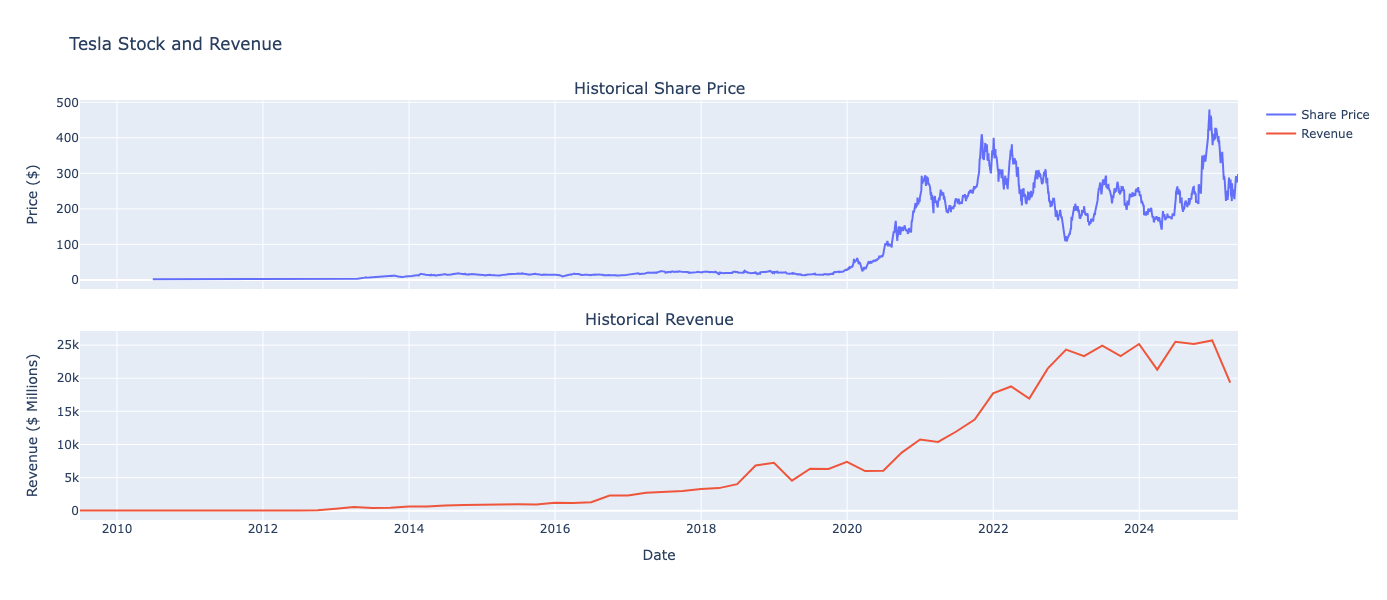

In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                        vertical_spacing=0.1, subplot_titles=("Historical Share Price", "Historical Revenue"), 
                        row_heights=[0.5, 0.5])
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Close'], name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=revenue_data['Date'], y=revenue_data['Revenue'], name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($ Millions)", row=2, col=1)
    fig.update_layout(showlegend=True, title_text=f"{stock} Stock and Revenue", height=600)
    fig.show()
# Ensure Revenue is numeric
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')
# Call the make_graph function
make_graph(tesla_data, tesla_revenue, 'Tesla')

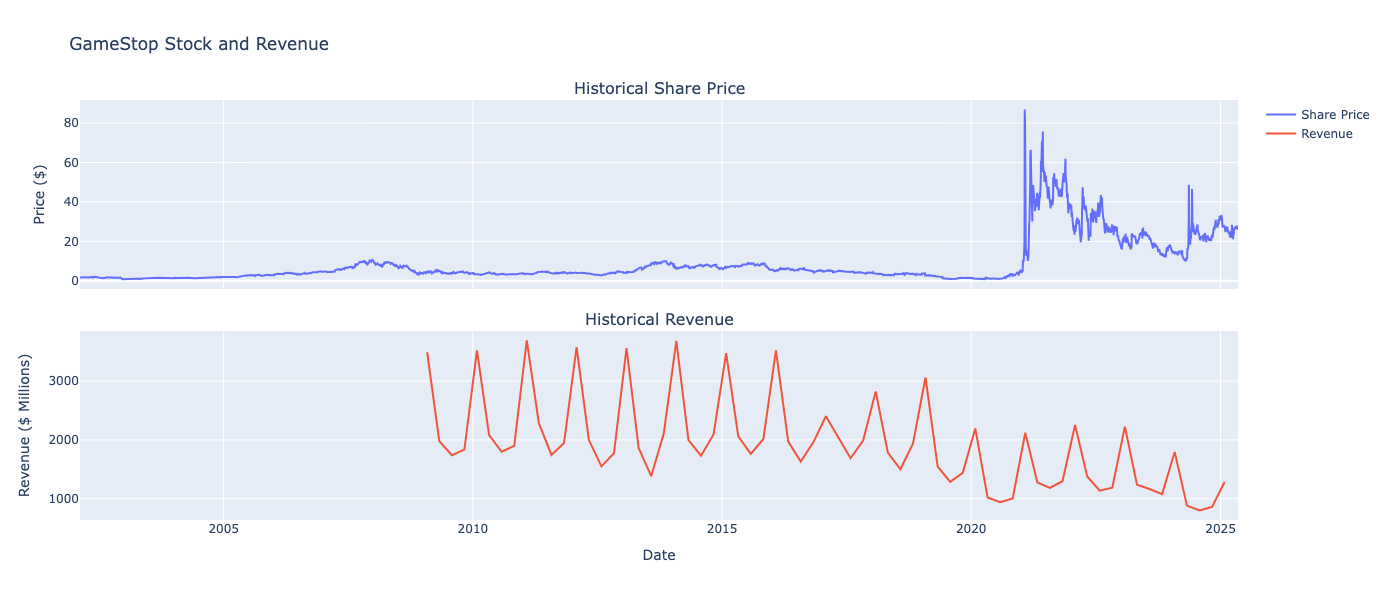

In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Define the make_graph function
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                        vertical_spacing=0.1, subplot_titles=("Historical Share Price", "Historical Revenue"), 
                        row_heights=[0.5, 0.5])
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    revenue_data['Date'] = pd.to_datetime(revenue_data['Date'])
    fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Close'], name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=revenue_data['Date'], y=revenue_data['Revenue'], name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($ Millions)", row=2, col=1)
    fig.update_layout(showlegend=True, title_text=f"{stock} Stock and Revenue", height=600)
    fig.show()
# Ensure Revenue is numeric
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')
# Call the make_graph function
make_graph(gme_data, gme_revenue, 'GameStop')